# Severe Weather Capstone - Modeling

Greg Welliver   

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as plticker
import seaborn as sns
sns.set()
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
import warnings
from scipy import stats
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import lightgbm as lgb
from lightgbm import LGBMRegressor
from numpy import mean
from numpy import std
from functools import partial
%matplotlib inline

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from scipy import stats

from sklearn.datasets import fetch_openml
from sklearn import linear_model, preprocessing, tree, svm, datasets, metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, mean_squared_error, mean_absolute_error, r2_score, f1_score, log_loss
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
# print('MAE: ', mean_absolute_error(y_test, y_pred))
# print('MSE: ', mean_squared_error(y_test, y_pred)) 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

import xgboost
from xgboost import XGBClassifier
import warnings
from subprocess import call
from IPython.display import Image
from datetime import datetime, timedelta, date
import os
import plotly.graph_objects as go
import itertools
from io import StringIO  
import pydotplus

# Seaborn settings
sns.set_context('notebook')
#sns.set_style("whitegrid")
#sns.set_style("white")
style_set = sns.set_style('whitegrid')
pd.options.display.float_format = '{:,}'.format
color_choice1 = 'plum'
color_choice2 = 'lightblue'
color_choice3 = 'lightgreen'
#ax.yaxis.set_major_formatter('{x:,.0f}')
#sns.set_context('notebook', font_scale = 4)


%matplotlib inline
import pandas as pd
#from mpl_toolkits.basemap import Basemap


import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx

from sklearn.feature_extraction.text import CountVectorizer


## Load the data



In [2]:
# load the data
X_train = pd.read_parquet("../Data/X_train.pqt")
X_test = pd.read_parquet("../Data/X_test.pqt")
y_train = pd.read_parquet("../Data/y_train.pqt") 
y_test = pd.read_parquet("../Data/y_test.pqt")


X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

# , index_col =[0]
# load data
#df = pd.read_parquet("../Data/all_storm_data11.pqt")
#df = pd.read_csv("../Data/all_storm_data4.csv")

In [3]:
# X_train = X_train.dropna(axis=0)
# X_test = X_test.dropna(axis=0)
# y_train = y_train.dropna(axis=0)
# y_test = y_test.dropna(axis=0)
# X_train = X_train.dropna(axis=0).reset_index()
# X_test = X_test.dropna(axis=0).reset_index()
# y_train = y_train.dropna(axis=0).reset_index()
# y_test = y_test.dropna(axis=0).reset_index()


In [4]:
len(X_train)

603779

In [5]:
len(X_test)

150945

# <font color='orange'>Random Forest Model</font>


In [6]:
# set the parameter grid
param_grid = {
    'n_estimators': [25, 50, 100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'criterion': ['mse', 'mae']
}

In [7]:
# markdown since it takes so long to run
# random_search = RandomizedSearchCV(RandomForestRegressor(random_state=1234),
#                                    param_grid, n_jobs=-1)
# random_search.fit(X_train, y_train.values.ravel())
# print(random_search.best_estimator_)

output: 
RandomForestRegressor(max_depth=3, max_features='log2', max_leaf_nodes=3,
                      n_estimators=150, random_state=1234)

In [8]:
rf_reg = RandomForestRegressor(max_depth=3,
                                      max_leaf_nodes=3,
                                      n_estimators=150,
                                      max_features='log2',
                                      random_state=1234)
rf_reg.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=3, max_features='log2', max_leaf_nodes=3,
                      n_estimators=150, random_state=1234)

In [9]:
y_pred = rf_reg.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


MAE:  162605.83467728167
MSE:  6075462975858.569
RMSE: 2464845.4263621825


First run of model scores:
- MAE:  382342.13392639376
- MSE:  433806680086561.1
- RMSE: 20828026.312796928

Run scores after removing all zeroes:
- MAE:  1058028.2120366283
- MSE:  282319113846858.0
- RMSE: 16802354.41379743

Run scores after removing all zeros & top 100 property damage:
- MAE:  672445.1295545553
- MSE:  62743486924408.66
- RMSE: 7921078.64652338



Run scores after removing all zeros & top 300 property damage:
- MAE:  493293.39488259994
- MSE:  18625206101190.57
- RMSE: 4315693.003584774


Run scores after removing top 300 property damage, but keeping zeros:
- MAE:  168564.59819218048
- MSE:  6248700238901.123
- RMSE: 2499740.034263788

#### This is the best performing model thus far

## now try removing some features

Run scores after removing top 300 property damage, but keeping zeros, also removed BEGIN_TIME and STATE:
- MAE:  167153.7628619848
- MSE:  6226045290341.035
- RMSE: 2495204.458624791


Run scores after removing top 300 property damage, but keeping zeros, also removed BEGIN_TIME and STATE, POPULATION:
- MAE:  162605.83467728167
- MSE:  6075462975858.569
- RMSE: 2464845.4263621825

## question -  do principal components analysis? other ways to eliminate variables faster?

## question -  how think about these scores?

In [10]:
len(X_test)

150945

In [11]:
len(y_test)

150945

In [12]:
len(y_pred)

150945

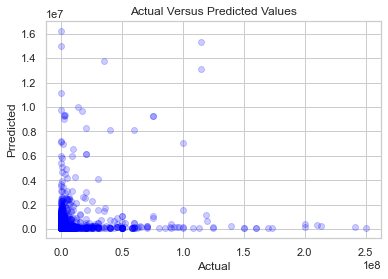

In [13]:
plt.scatter(y_test, y_pred, color = 'blue', alpha=0.2)

plt.title('Actual Versus Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Prredicted')
plt.show() 

Plot on logarithmic scale

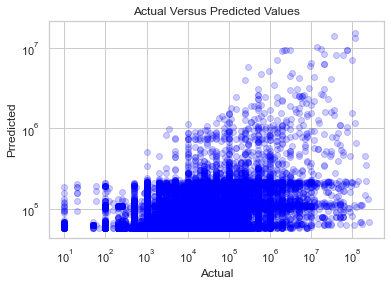

In [14]:
plt.scatter(y_test, y_pred, color = 'blue', alpha=0.2)
plt.title('Actual Versus Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Prredicted')
plt.xscale("log")
plt.yscale("log")
plt.show()

24


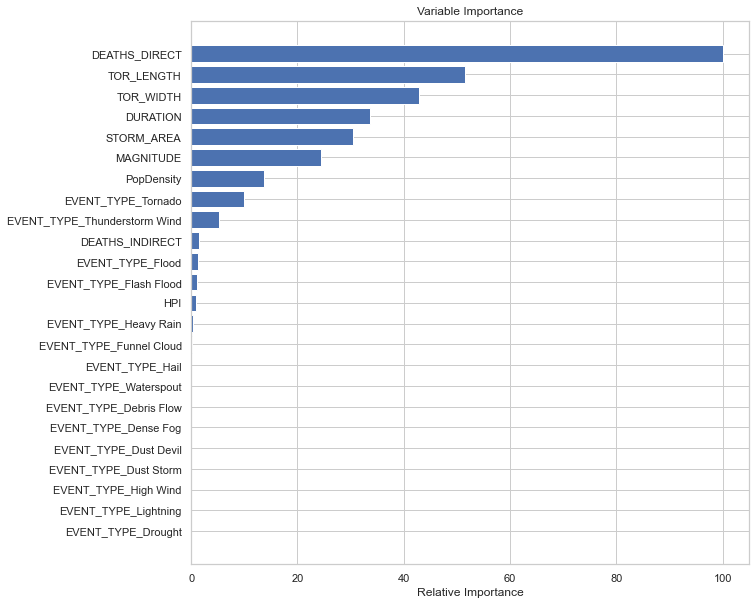

In [15]:
feature_importance = rf_reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# <font color='orange'>Light GBM</font>

In [16]:
lgbm = lgb.LGBMRegressor(learning_rate=0.09,max_depth=-5,random_state=1234)
lgbm.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's l2: 4.71121e+12	valid_0's l2: 5.83492e+12
[40]	training's l2: 4.3526e+12	valid_0's l2: 5.7905e+12
[60]	training's l2: 4.13464e+12	valid_0's l2: 5.78904e+12
[80]	training's l2: 4.00765e+12	valid_0's l2: 5.79107e+12
[100]	training's l2: 3.91604e+12	valid_0's l2: 5.79744e+12


LGBMRegressor(learning_rate=0.09, max_depth=-5, random_state=1234)

In [17]:
y_pred = lgbm.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print(lgbm.score(X_train, y_train))

MAE:  148307.4896570572
MSE:  5797444191238.25
RMSE: 2407788.2363775787
0.29527741081405834


#### Now use the LightGBM model as a final model and make predictions for regression

In [18]:
# define the model
lgbm2 = LGBMRegressor(random_state=1234)
lgbm2.fit(X_train, y_train)

LGBMRegressor(random_state=1234)

In [19]:
y_pred = lgbm2.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print(lgbm.score(X_train, y_train))

MAE:  148356.00313875749
MSE:  5847871803753.926
RMSE: 2418237.334041869
0.29527741081405834


Text(0, 0.5, 'Predicted')

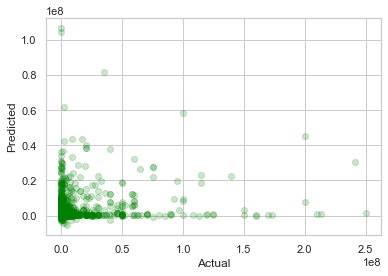

In [20]:
plt.scatter(y_test, y_pred, c='green', alpha=0.2)
plt.xlabel("Actual")
plt.ylabel("Predicted")

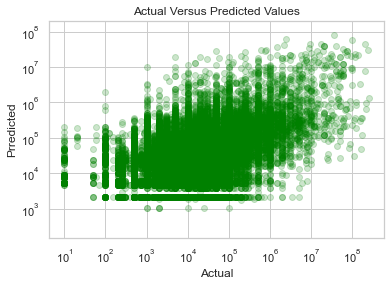

In [21]:
plt.scatter(y_test, y_pred, color = 'green', alpha=0.2)
plt.title('Actual Versus Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Prredicted')
plt.xscale("log")
plt.yscale("log")
plt.show()

plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

XXXXXXXXXXXXXXXXXXX

In [54]:
# defining parameters
params = {
    'task': 'train', 
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rate': 0.05,
    'metric': 'l2',
    'verbose': -1
}

params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

#gbm = lgb.LGBMRegressor(params)
lgbm3 = lgb.LGBMRegressor(**params,random_state=1234)
lgbm3.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

In [57]:
# define the model
lgbm3 = lgb.LGBMRegressor(**params, random_state=1234)
lgbm3.fit(X_train, y_train)

LGBMRegressor(learnnig_rate=0.05, metric='l2', num_leaves=10,
              objective='regression', task='train', verbose=-1)

In [58]:
y_pred = lgbm3.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print(lgbm.score(X_train, y_train))

MAE:  151579.0699708018
MSE:  5823972794346.13
RMSE: 2413290.8640166293
0.29527741081405834


In [ ]:
plt.scatter(y_test, y_pred, c='green', alpha=0.2)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [ ]:
plt.scatter(y_test, y_pred, color = 'green', alpha=0.2)
plt.title('Actual Versus Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Prredicted')
plt.xscale("log")
plt.yscale("log")
plt.show()

In [66]:
param_grid = {
    'learning_rate': [0.1, 0.3, 0.6, 0.9],
    'max_depth': [2, 3, 6, 9],
    'num_leaves': [25, 50, 100, 150],
    'criterion': ['mse', 'mae', 'rmse'],
    'max_leaf_nodes': [3, 6, 9, 12]
}

In [ ]:
# markdown since it takes so long to run
random_search = RandomizedSearchCV(LGBMRegressor(random_state=1234),
                                   param_grid, n_jobs=-1)
random_search.fit(X_train, y_train.values.ravel())
print(random_search.best_estimator_)

Note from article: The rule of thumb is to set early_stopping_rounds at 10% of your num_iterations.



In [ ]:
# loading data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [ ]:
# fitting the model
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

In [ ]:
# prediction
y_pred = model.predict(X_test)

# accuracy check
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 
 


In [ ]:
# plotting feature importance
lgb.plot_importance(model, height=.5)

In [ ]:
# example: https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/simple_example.py

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=5)])

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
rmse_test = mean_squared_error(y_test, y_pred) ** 0.5
print(f'The RMSE of prediction is: {rmse_test}')

Light GBM hyperparameter tuning: 
    
There are many hyperparameters we can look at for LightGBM, although in this case, we will look at the number of trees and tree depth, the learning rate, and the boosting type

# Explore Number of Trees
# get a list of models to evaluate
def get_models():
 models = dict()
 trees = [10, 50, 100, 500, 1000, 5000]
 for n in trees:
 models[str(n)] = LGBMClassifier(n_estimators=n)
 return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#Explore Tree Depth
# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(1,11):
 models[str(i)] = LGBMClassifier(max_depth=i, num_leaves=2**i)
 return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()



# Explore Learning Rate
# get a list of models to evaluate
def get_models():
 models = dict()
 rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
 for r in rates:
 key = '%.4f' % r
 models[key] = LGBMClassifier(learning_rate=r)
 return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# <font color='orange'>XGBoost</font>


# <font color='orange'>Tweedie Regression</font>


## WORKING, MARKDOWN UNTIL FINAL


#### write to parquet
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/all_storm_data9.pqt')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_parquet(filepath)

resources

drop columns
# drop unnecessary columns
df.drop(['', '', '', '',], axis=1, inplace=True)

backup below

## scratch

code looks good; 

use either 
randomsearch cv
gridserarch cv
hyparamter tune




#### Using k-fold cross-validation

lgbm2 = LGBMRegressor(learning_rate=0.09,max_depth=-5,random_state=1234)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1234)

n_scores = cross_val_score(lgbm2, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

First run output:
MAE: -374840.173 (59982.424)


print(lgbm2.score(X_train, y_train))